# Calculate How Additional Users Improve Results

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import os

# Preperation
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Visualisations
from sklearn.tree import export_graphviz # Note that you need to brew install graphviz on your local machine
import pydot 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

# Evaluation
from sklearn import metrics

# User Defined Functions
import cozie_functions

In [2]:
# Add Data Folder to Path
data_path = os.path.abspath(os.path.join(os.path.dirname( "__file__" ), '..', 'data-processed-preferences'))

In [3]:
# The following participants took part in the experiment:
participant_ids = ['cresh' + str(id).zfill(2) for id in range(1,31)]
print(participant_ids)

['cresh01', 'cresh02', 'cresh03', 'cresh04', 'cresh05', 'cresh06', 'cresh07', 'cresh08', 'cresh09', 'cresh10', 'cresh11', 'cresh12', 'cresh13', 'cresh14', 'cresh15', 'cresh16', 'cresh17', 'cresh18', 'cresh19', 'cresh20', 'cresh21', 'cresh22', 'cresh23', 'cresh24', 'cresh25', 'cresh26', 'cresh27', 'cresh28', 'cresh29', 'cresh30']


In [4]:

# Function to convert my dataframe into a numpy array
def create_training_data(dataframe, preference, drop_features):
    clean_dataframe = dataframe.copy(deep=True)
    
    labels = np.array(clean_dataframe[preference + '_cozie'])
    #print(clean_dataframe.columns.values)
    features_df = clean_dataframe.drop(drop_features, axis=1)
    #print(features_df.columns)
    feature_set = np.array(features_df)
    
    return (feature_set, labels)


# Do Everything within a for loop 
- read data
- convert to features and labels
- run the rf model
- evalaute

In [5]:
# Define Feature Set the 
feature_set = 'fs4'



def run_rf_model(train_set_df, test_features, test_labels):

    train_features, train_labels = create_training_data(train_set_df, 'thermal', thermal_drop_features)
    #print('Training Features Shape:', train_features.shape)
    #print('Training Labels Shape:', train_labels.shape)


    # Instantiate model with 1000 decision trees
    thermal_rf = RandomForestClassifier(n_estimators = 1000, random_state = 42 )
    # Train the model on training data
    thermal_rf.fit(train_features, train_labels);

    # Use the forest's predict method on the test data
    predictions = thermal_rf.predict(test_features)
    
    f1_score = metrics.f1_score(predictions, test_labels, average="micro")
    print(f1_score)
    #print("Summary of Thermal Prediction")
    #print(metrics.accuracy_score(predictions, test_labels))
    #print(metrics.f1_score(predictions, test_labels, average="micro")) # Micro averages all the results
    #print(metrics.f1_score(predictions, test_labels, average="macro")) #Macro treats each class equally 
    #print(metrics.confusion_matrix(predictions, test_labels))
    #print(metrics.classification_report(predictions,test_labels))
    return(f1_score)
    


def test_one_participant(test_participant, test_features, test_labels, run_participant = True):
    
    # Empty dataframe to append results
    f1_micro_array = []
    
    if run_participant == True:
        # First run model using the data of the testing participant
        train_set_df = pd.read_csv(os.path.join(data_path, 
                        '2019-11-15_' + feature_set + '_train_' + test_participant + '.csv'))
        #print('train shape', train_set_df.shape)


        f1_score = run_rf_model(train_set_df, test_features, test_labels)

        f1_micro_array.append(f1_score)
    
    else:
        train_set_df = pd.DataFrame()
            
            
    for participant in participant_ids:

        # Don't rerun participant data as we ran it above
        if participant != test_participant:
            new_train_set_df = pd.read_csv(os.path.join(data_path, 
                    '2019-11-15_' + feature_set + '_train_' + participant + '.csv'))

            train_set_df = pd.concat([train_set_df, new_train_set_df])

            #print('train shape', train_set_df.shape)

            f1_score = run_rf_model(train_set_df, test_features, test_labels)



            f1_micro_array.append(f1_score)
    plt.plot(f1_micro_array)
    return(f1_micro_array)





    
    



0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6666666666666666
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.7083333333333334
0.7083333333333334
0.75
0.7083333333333334
0.7083333333333334
0.7083333333333334
0.7083333333333334
0.7083333333333334
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.8888888888888888
0.9444444444444444
0.8888888888888888
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9444444444444444
0.9444444444444444
0.9444444444444444
1.0
1.0
1.0


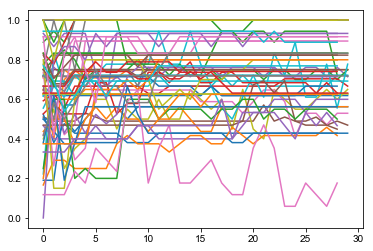

In [6]:
for with_user in [True, False]:
    all_user_arrays = []
    for test_participant in participant_ids:
        # Define the participant test set to use. TODO: Cycle through all participants and average


        # Read Test Set Data
        test_set_df = pd.read_csv(os.path.join(data_path, 
                    '2019-11-15_' + feature_set + '_val_' + test_participant + '.csv'))

        # labels to drop. TODO: Eventually have this dynamic
        # TODO Don't drop rooms
        thermal_drop_features = ['light_cozie', 'noise_cozie','thermal_cozie' ,'user_id', 'room', 
                                 'user_grouped_dimmer', 'user_grouped_brighter', 'user_grouped_quieter', 'user_grouped_louder',
                                 'room_grouped_dimmer', 'room_grouped_brighter', 'room_grouped_quieter', 'room_grouped_louder',]

        # Convert test set data to labels
        test_features, test_labels = create_training_data(test_set_df, 'thermal', thermal_drop_features)

        f1_micro_array = test_one_participant(test_participant, test_features, test_labels, run_participant = with_user)
        all_user_arrays.append(f1_micro_array)
    if with_user :
        with_user_array = all_user_arrays
    else:
        without_user_array = all_user_arrays

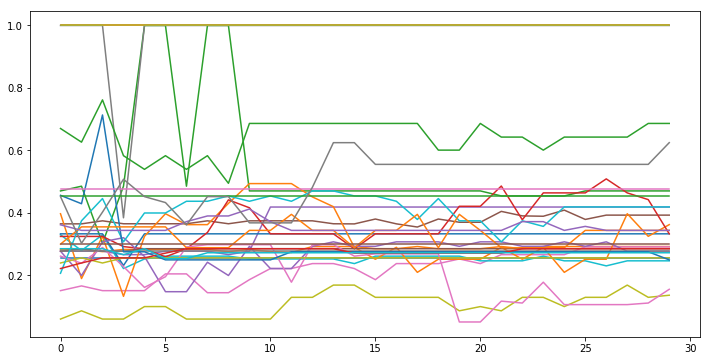

In [32]:

fig = plt.figure(figsize=(12, 6))
for line in all_user_arrays:
    plt.plot(line)
    plt.savefig("user_prediction_accuracy.pdf", bbox_inches='tight')

In [7]:
#with_users = all_user_arrays
#all_user_arrays
with_user_df = pd.DataFrame.from_records(with_user_array)
with_user_df.to_csv('with_user_array_thermal.csv')
without_user_df = pd.DataFrame.from_records(without_user_array)
without_user_df.to_csv('without_user_array_thermal.csv')
#with_user_df = pd.DataFrame.from_records(with_users)

In [10]:
without_user_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.591118,0.535252,0.604271,0.663788,0.674051,0.686480,0.695734,0.703131,0.708190,0.714162,...,0.723288,0.728961,0.720677,0.713587,0.709540,0.710102,0.718531,0.716414,0.712016,0.717221
std,0.294185,0.224794,0.239573,0.241820,0.241240,0.215845,0.242699,0.231027,0.190092,0.175461,...,0.213140,0.195728,0.194993,0.211612,0.218971,0.218292,0.214446,0.216268,0.211260,0.204559
min,0.000000,0.150000,0.117647,0.200000,0.150000,0.200000,0.100000,0.100000,0.333333,0.375000,...,0.058824,0.235294,0.294118,0.117647,0.058824,0.117647,0.117647,0.058824,0.058824,0.117647
25%,0.376488,0.391667,0.445472,0.482993,0.533482,0.620536,0.578125,0.620536,0.578125,0.625000,...,0.625000,0.625000,0.625000,0.625000,0.620536,0.620536,0.620536,0.620536,0.625000,0.625000
50%,0.649123,0.549231,0.591667,0.692105,0.727778,0.686154,0.731481,0.731481,0.730370,0.722222,...,0.750000,0.750000,0.750000,0.750000,0.745370,0.745370,0.750000,0.750000,0.731481,0.745370
75%,0.817647,0.657895,0.816176,0.858333,0.817647,0.817647,0.879386,0.879386,0.820028,0.817647,...,0.839912,0.839912,0.833333,0.833333,0.833333,0.875000,0.879386,0.875000,0.833333,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Convert into numpy arrays for classification

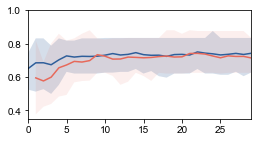

In [29]:
#fig, ax = plt.subplots(1)


fig=plt.figure(figsize=(4, 2))
ax1=fig.add_subplot(111, label="1")

mean = without_user_df.describe().loc['mean']
std = without_user_df.describe().loc['std']
plt.plot(np.arange(30), with_user_df.describe().loc['mean'], color='#2e5e9a')
plt.fill_between(np.arange(30), with_user_df.describe().loc['25%'], with_user_df.describe().loc['75%'], facecolor='#2e5e9a', alpha=0.2)



plt.plot(np.arange(1,30), mean, color='#e7695a')
plt.fill_between(np.arange(1,30), without_user_df.describe().loc['25%'], without_user_df.describe().loc['75%'], facecolor='#e7695a', alpha=0.1)
plt.margins(x=0)
plt.axis([None, None, 0.35, 1])

plt.savefig("grouped_accuracy_thermal.pdf", bbox_inches='tight')


In [64]:
#fig, ax = plt.subplots(1)


fig=plt.figure(figsize=(6, 3))
ax1=fig.add_subplot(111, label="1")

without_mean = without_user_df.describe().loc['mean']
without_std = without_user_df.describe().loc['std']

with_mean = with_user_df.describe().loc['mean']
with_std = with_user_df.describe().loc['std']

plt.plot(np.arange(30), with_mean, color='#2e5e9a')
plt.fill_between(np.arange(30), with_mean - with_std, with_mean + with_std, facecolor='#2e5e9a', alpha=0.2)



plt.plot(np.arange(1,30), without_mean, color='#e7695a')
plt.fill_between(np.arange(1,30), without_mean - without_std, without_mean + without_std, facecolor='#e7695a', alpha=0.1)
plt.margins(x=0)
plt.axis([None, None, 0.3, 1])
#plt.savefig("grouped_accuracy_thermal.pdf", bbox_inches='tight')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [8]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (885, 8)
Training Labels Shape: (885,)
Testing Features Shape: (21, 8)
Testing Labels Shape: (21,)


# Model Usign RF